In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras import layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc

2024-04-26 21:05:53.639873: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 21:05:54.069343: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 21:05:54.070991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 21:05:56.061927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Define image size and batch size
image_size = (224, 224)
batch_size = 10

# Define directories
train_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train'
test_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test'

# Create data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


# MobileNet

In [3]:
from keras.applications import MobileNet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the MobileNet model without the top (classification) layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Combine the base MobileNet model with your classification layers
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

2024-04-26 21:03:55.107109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 21:03:55.110646: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [4]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=3, 
          validation_data=test_generator)

Epoch 1/5


2024-04-26 21:03:56.871556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-26 21:04:04.339037: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.
2024-04-26 21:04:04.527045: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of free system memory.
2024-04-26 21:04:04.605867: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32688640 exceeds 10% of free system memory.
2024-04-26 21:04:07.411446: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32688640 exceeds 10% of free system memory.
2024-04-26 21:04:07.442194: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32112640 exceeds 10% of

3/3 [==============================] - ETA: 0s - loss: 1.3202 - accuracy: 0.5000

2024-04-26 21:04:11.919749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 18s 4s/step - loss: 1.3202 - accuracy: 0.5000 - val_loss: 4.2062 - val_accuracy: 0.3810
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 0.5207 - accuracy: 0.8000 - val_loss: 6.6057 - val_accuracy: 0.3810
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 0.1748 - accuracy: 0.9333 - val_loss: 5.6937 - val_accuracy: 0.4286
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.0915 - accuracy: 0.8667 - val_loss: 5.9052 - val_accuracy: 0.3651
Epoch 5/5
3/3 [==============================] - 8s 2s/step - loss: 0.1488 - accuracy: 0.9333 - val_loss: 4.5458 - val_accuracy: 0.3651


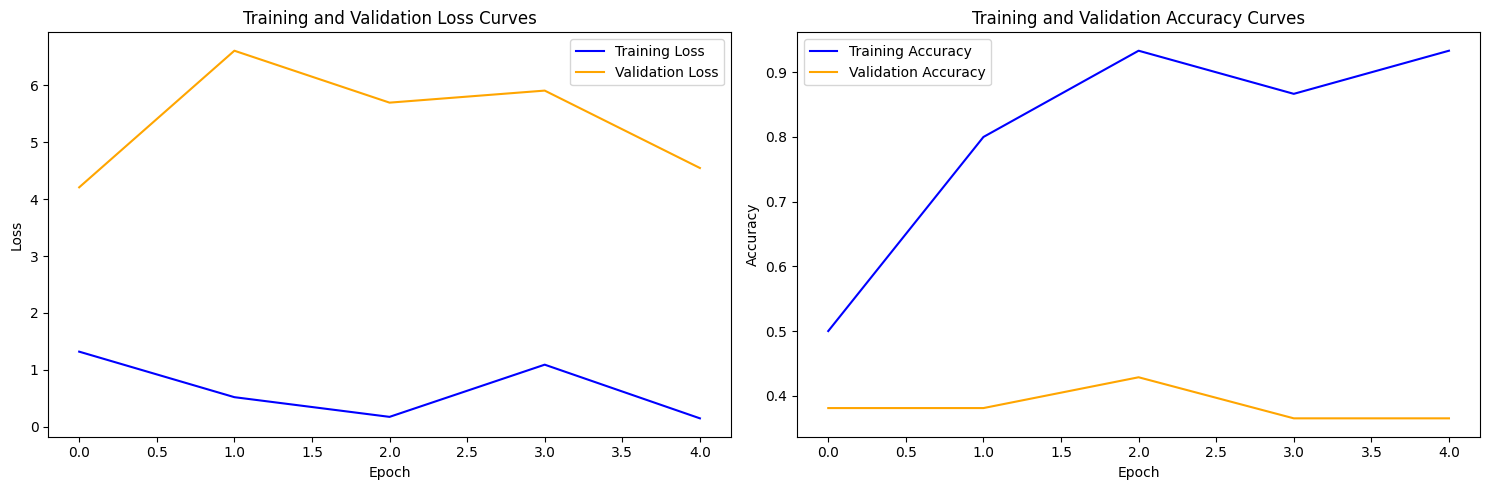

In [5]:
# Plot the training and validation loss curves
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss", color="blue")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.models import load_model
model_path = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/MobileNet'

# Save the model
model.save(model_path)

print("MobileNet Model saved successfully")

INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/MobileNet/assets


INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/MobileNet/assets


MobileNet Model saved successfully


# VGG16

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

num_classes = 3

# Load pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in vgg16.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

# Add the pre-trained VGG16 base model
model.add(vgg16)

# Add a Flatten layer to convert 2D feature maps to a vector
model.add(Flatten())

# Add a Dense layer for classification
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-04-26 21:06:12.191623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 21:06:12.192922: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 3)                 75267     
                                                                 
Total params: 14,789,955
Trainable params: 75,267
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=2, 
          validation_data=test_generator)

Epoch 1/5


2024-04-26 21:06:15.563521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 1.6346 - accuracy: 0.4000

2024-04-26 21:06:18.832089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 9s 7s/step - loss: 1.6346 - accuracy: 0.4000 - val_loss: 1.5699 - val_accuracy: 0.6190
Epoch 2/5
2/2 [==============================] - 9s 7s/step - loss: 1.2780 - accuracy: 0.7000 - val_loss: 1.1081 - val_accuracy: 0.4762
Epoch 3/5
2/2 [==============================] - 9s 8s/step - loss: 0.9013 - accuracy: 0.4500 - val_loss: 0.4990 - val_accuracy: 0.7619
Epoch 4/5
2/2 [==============================] - 9s 7s/step - loss: 0.4064 - accuracy: 0.8500 - val_loss: 0.4905 - val_accuracy: 0.7460
Epoch 5/5
2/2 [==============================] - 9s 7s/step - loss: 0.3250 - accuracy: 0.9000 - val_loss: 0.3644 - val_accuracy: 0.8095


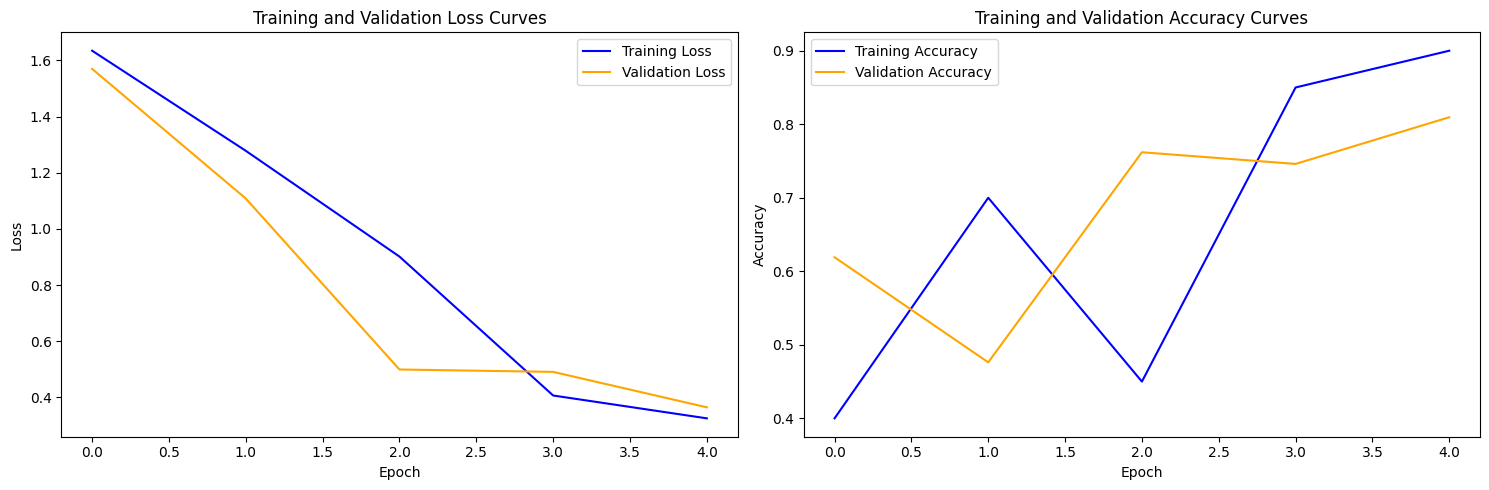

In [5]:
# Plot the training and validation loss curves
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss", color="blue")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.models import load_model
model_path = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG16'

# Save the model
model.save(model_path)

print("VGG16 Model saved successfully")

INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG16/assets


INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG16/assets


VGG16 Model saved successfully


# VGG19

In [7]:
from tensorflow.keras.applications import VGG19

# Load pre-trained VGG19 model
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in vgg19.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

# Add the pre-trained VGG19 base model
model.add(vgg19)

# Add a Flatten layer to convert 2D feature maps to a vector
model.add(Flatten())

# Add a Dense layer for classification
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                 75267     
                                                                 
Total params: 20,099,651
Trainable params: 75,267
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
# Train the model for 8 epochs with 3 steps per epoch
history = model.fit(train_generator, epochs=5, steps_per_epoch=2, 
          validation_data=test_generator)

Epoch 1/5


2024-04-26 21:07:26.761934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 2.0852 - accuracy: 0.4500

2024-04-26 21:07:30.289169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 11s 9s/step - loss: 2.0852 - accuracy: 0.4500 - val_loss: 2.9379 - val_accuracy: 0.3651
Epoch 2/5
2/2 [==============================] - 9s 8s/step - loss: 2.2223 - accuracy: 0.3500 - val_loss: 0.8633 - val_accuracy: 0.5397
Epoch 3/5
2/2 [==============================] - 9s 8s/step - loss: 0.9784 - accuracy: 0.5500 - val_loss: 1.9648 - val_accuracy: 0.4286
Epoch 4/5
2/2 [==============================] - 9s 8s/step - loss: 2.2233 - accuracy: 0.4000 - val_loss: 1.1776 - val_accuracy: 0.4127
Epoch 5/5
2/2 [==============================] - 8s 8s/step - loss: 0.5224 - accuracy: 0.8333 - val_loss: 0.5917 - val_accuracy: 0.6825


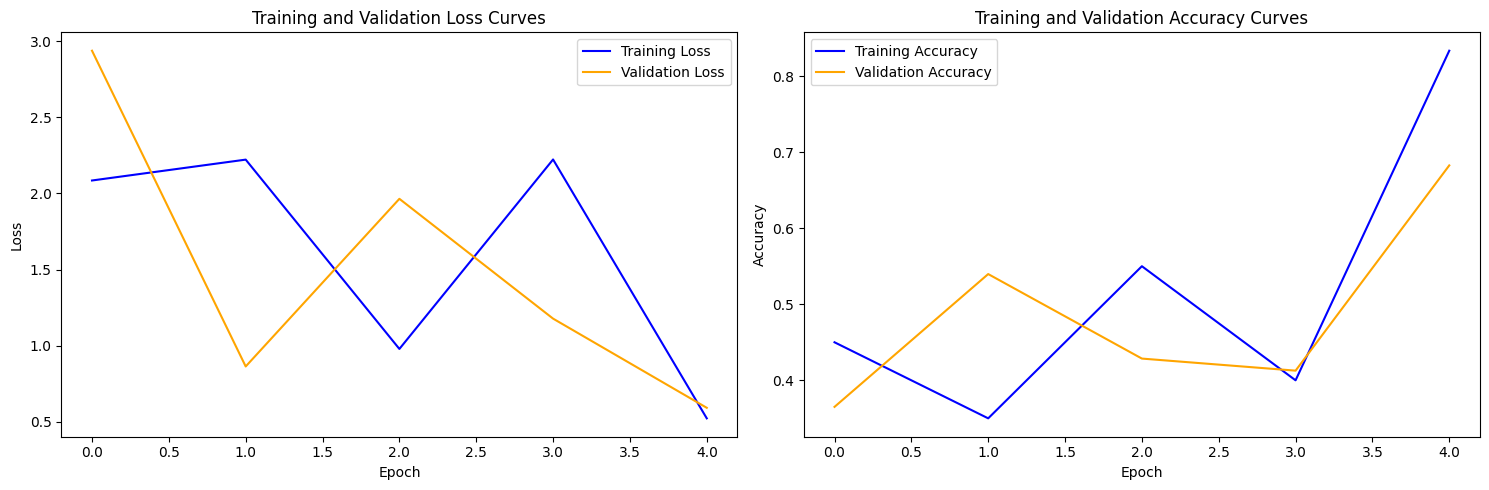

In [9]:
# Plot the training and validation loss curves
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss", color="blue")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.models import load_model

model_path = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG19'

# Save the model
model.save(model_path)

print("VGG19 Model saved successfully")

INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG19/assets


INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG19/assets


VGG19 Model saved successfully


# Model Comparison

### Metric Performance

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss

# Load saved models
model_paths = ['/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/MobileNet',
               '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG16',
               '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/VGG19']

# Define empty lists to store evaluation metrics
precisions = []
recalls = []
f1_scores = []
hamming_losses = []

# Iterate over each model path
for model_path in model_paths:
    # Load the model
    model = load_model(model_path)

    # Generate predictions using the test data generator
    y_true = []  # True labels
    y_pred = []  # Predicted labels

    test_generator.reset()  # Reset generator to start from the beginning
    for i in range(len(test_generator)):
        X_batch, y_batch = test_generator[i]
        y_true.extend(y_batch)
        y_pred_batch = model.predict(X_batch)
        y_pred.extend(y_pred_batch)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_true, y_pred_binary, average='micro')
    recall = recall_score(y_true, y_pred_binary, average='micro')
    f1 = f1_score(y_true, y_pred_binary, average='micro')
    hamming_loss_value = hamming_loss(y_true, y_pred_binary)

    # Append metrics to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    hamming_losses.append(hamming_loss_value)

# Print evaluation metrics for each model
for i, model_path in enumerate(model_paths):
    print("Model:", model_path.split('/')[-1])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print("F1-score:", f1_scores[i])
    print("Hamming Loss:", hamming_losses[i])
    print()

1/1 [==============================] - 0s 346ms/step
Model: MobileNet
Precision: 0.36507936507936506
Recall: 0.36507936507936506
F1-score: 0.36507936507936506
Hamming Loss: 0.42328042328042326

Model: VGG16
Precision: 0.8360655737704918
Recall: 0.8095238095238095
F1-score: 0.8225806451612904
Hamming Loss: 0.1164021164021164

Model: VGG19
Precision: 0.7090909090909091
Recall: 0.6190476190476191
F1-score: 0.6610169491525425
Hamming Loss: 0.21164021164021163



#### Interpreting our metrics:
- For the MobileNet model, the precision, recall, and F1-score are relatively low, indicating that the model is not performing well in correctly predicting the relevant labels.
- For the VGG16 model, the precision, recall, and F1-score are higher compared to MobileNet, indicating better performance.
- The VGG19 model shows the highest precision, recall, and F1-score among the three models, indicating superior performance in correctly predicting the relevant labels.
- Hamming loss is lowest for the VGG19 model, indicating that it has the fewest incorrectly predicted labels among the three models, followed by VGG16 and then MobileNet.

### ROC-AUC Curves

2024-04-26 21:10:05.082205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 3s 281ms/step


2024-04-26 21:10:07.930278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 6s 690ms/step


2024-04-26 21:10:13.929178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 7s 890ms/step


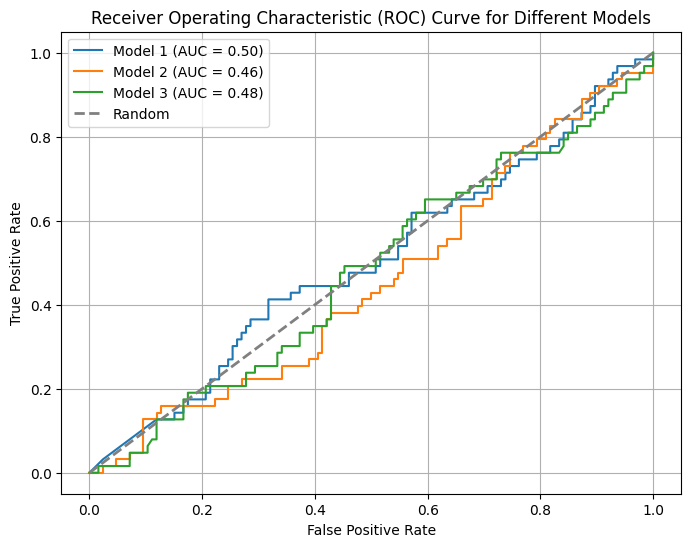

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import load_model
from keras.utils import to_categorical

# Load saved models
models = [load_model(model_path) for model_path in model_paths]

# Assuming you have already loaded or trained your models and have test_generator

# Initialize lists to store ROC curve values and AUC for each model
model_fpr = []
model_tpr = []
model_auc = []

# Generate predictions using the test data for all models
model_predictions = [model.predict(test_generator) for model in models]

# Get the true labels from the test generator
true_labels = test_generator.labels

# Convert true labels to one-hot encoded format
true_labels_categorical = to_categorical(true_labels, num_classes=3)

# Compute ROC curve and AUC for each model
for model_prediction in model_predictions:
    model_fpr_i, model_tpr_i, _ = roc_curve(true_labels_categorical.ravel(), model_prediction.ravel())
    model_auc_i = auc(model_fpr_i, model_tpr_i)
    model_fpr.append(model_fpr_i)
    model_tpr.append(model_tpr_i)
    model_auc.append(model_auc_i)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for i, model_path in enumerate(model_paths):
    plt.plot(model_fpr[i], model_tpr[i], label=f"Model {i + 1} (AUC = {model_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

#### Result Interpretation

The AUC (Area Under the Curve) values for the ROC curves of our models are as follows:

- MobileNet: AUC = 0.50
- VGG16: AUC = 0.46
- VGG19: AUC = 0.48

Here's an interpretation of these AUC values:

1. **MobileNet (AUC = 0.50):**
   - The ROC curve for MobileNet has an AUC of 0.50, which indicates that the model's performance is equivalent to random guessing. In other words, MobileNet's ability to distinguish between different classes is no better than chance.

2. **VGG16 (AUC = 0.46):**
   - The ROC curve for VGG16 has an AUC of 0.46, which suggests poor performance. The model's ability to differentiate between classes is slightly worse than random guessing. This indicates that the model may not be effectively learning the underlying patterns in the data.

3. **VGG19 (AUC = 0.48):**
   - The ROC curve for VGG19 has an AUC of 0.48, indicating performance slightly better than random guessing but still relatively poor. The model's ability to distinguish between classes is marginally better than chance, but it may still struggle to effectively classify instances.

Overall, these AUC values suggest that all three models are not performing well in distinguishing between different classes in the dataset. Further analysis and potentially model improvement steps may be necessary to enhance classification performance.